In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy import optimize
import matplotlib.ticker as ticker

In [170]:
h = 6.62607015 * 10**(-34)

In [134]:
data = pd.read_csv('Calibration.csv')
data

,lambda,angle
0,5401,2250
1,5852,2512
2,5882,2578
3,5945,2558
4,5976,2574
5,6030,2598
6,6074,2628
7,6094,2638
8,6143,2646
9,6164,2656


In [137]:
an = np.array(data.angle)
lam = np.array(data['lambda'])
an.sort()
lam.sort()

In [139]:
def rid(lam, m):
    return 1/(lam * (1/4 - 1/((m+3)**2)))

In [140]:
def se(a):
    a = np.array(a)
    return np.sqrt(((sum(abs(np.mean(a) - a))**2))/len(a))

In [141]:
def se_rel(a):
    return np.sqrt(((sum(abs(np.mean(a) - a))**2))/len(a))/np.mean(a)

a =  2.3357303129735997e-07
b =  -0.0007557396292798773
sigma_a =  2.3504157619325295e-08
sigma_b =  0.00013107993778548388
S_e =  19.378163188494415
Relative S_r a = %  10.062873050357572
Relative S_r b = %  17.344589684993256


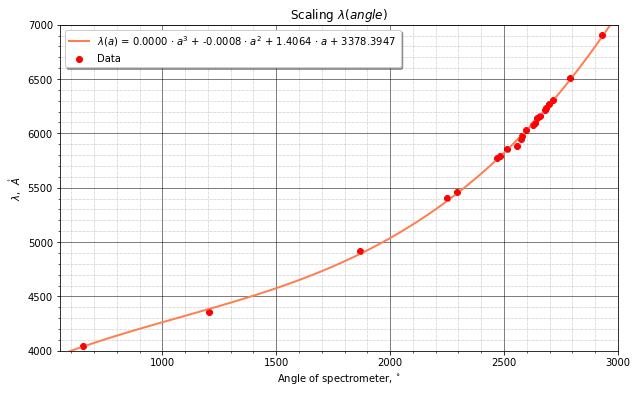

In [154]:
def approx(x, a, b,c,d):
    return a * x**3 + b*x**2 + c*x**1 + d
beta_opt1, beta_cov1 = curve_fit(approx, an, lam)
a = beta_opt1[0]
b = beta_opt1[1]
c = beta_opt1[2]
d = beta_opt1[3]



print('a = ', a)
print('b = ', b)


#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])


print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = lam - approx(an,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(an))
print('S_e = ', S_e)


print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))


# график
fig, ax = plt.subplots(figsize=(10, 6))
dots = np.arange(350, 3000, 0.1)
ax.plot(dots, approx(dots, *beta_opt1), 'coral', lw = 2)
ax.scatter(an, lam, c = 'r')
lgnd = ax.legend([r'$\lambda(a)$ = %.4f $\cdot\;a^{3}$ + %.4f $\cdot \; a^{2}$ + %.4f $\cdot \; a$ + %.4f '%(a,b,c,d), 'Data'], loc='upper left', shadow=True)

ax.set_title(r'Scaling $\lambda(angle)$')
ax.set_ylabel(r'$\lambda, \;\; \mathring{A}$')
ax.set_xlabel(r'Angle of spectrometer, $^{\circ}$')

ax.grid(which='major',
color = 'k')

ax.minorticks_on()

ax.grid(which='minor',
color = 'gray',
linestyle = ':', linewidth = 0.5)

ax.grid(which='major', linewidth = 0.5)
plt.errorbar(an, lam, fmt = 'ro', markersize = '5', yerr = S_e, capsize = 2, elinewidth = 2, capthick = 1, ecolor = 'violet')


plt.xlim (550, 3000)
plt.ylim (4000, 7000)
plt.savefig('Scale.png', dpi=400, quality=100)
plt.show()

In [157]:
an_H = [740, 1174, 1814, 2810]
lam_H = []
for i in range(4):
    print('%.1f' %(approx(an_H[i], *beta_opt1)))
    lam_H.append(approx(an_H[i], *beta_opt1))
lam_H.reverse()
lam_H

4099.9
4365.8
4837.0
6545.5


[6545.472327440167, 4836.975929500812, 4365.817955521755, 4099.926911041302]

In [160]:
r = []
for i in range(4):
    print('%.1f' %(rid(lam_H[i]/10**8, i)))
    r.append(rid(lam_H[i]/10**8, i))
r

109999.7
110261.7
109072.5
109758.1


[109999.70116466461,
 110261.72987145187,
 109072.45355665937,
 109758.05417119221]

In [163]:
se_rel(r)

0.0065176478178711784

In [161]:
np.mean(r)

109772.98469099202

In [168]:
n = [2840, 2772, 2026]
lam_I = []
for i in range(3):
    print('%.1f' %(approx(n[i], *beta_opt1)))
    lam_I.append(approx(n[i], *beta_opt1))

6627.3
6444.9
5068.1


In [180]:
nu = 3*10**(18)/np.array(lam_I)
nu

array([4.52670786e+14, 4.65483431e+14, 5.91940445e+14])

In [190]:
en2 = h * (nu[1]-nu[0])/(5*1.6*10**(-19))
en2

0.01061218511427069

In [184]:
en_edge = h*nu[2]/(1.6*10**(-19))
en_edge

2.4513993208916

In [186]:
en15 = h*nu[0]/(1.6*10**(-19))
en15

1.8746427399937011

In [189]:
en10 = h*nu[1]/(1.6*10**(-19))
en10 

1.9277036655650546

In [191]:
en1 = 0.027
en_el = en10 + en1
en_el

1.9547036655650545

In [194]:
D1 = en_edge - 0.94
D1

1.5113993208916

In [195]:
D2 = en_edge - en_el
D2

0.49669565532654536